In [1]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import pinot
import torch
from matplotlib import pyplot as plt
import numpy as np
import scipy

Using backend: pytorch


In [2]:
ds_all = pinot.data.moonshot_with_date()

ds_all_ = ds_all.filter_by_time(after='1989-06-04')

g_all, y_all = pinot.data.utils.batch(ds_all_, len(ds_all_))[0]


In [26]:
ds_0 = ds_all.filter_by_time(before='2020-05-12')
ds_1 = ds_all.filter_by_time(before='2020-05-19')
ds_2 = ds_all.filter_by_time(before='2020-05-26')
ds_3 = ds_all.filter_by_time(before='2020-06-02')




collection = [
    ds_0,
    ds_1,
    ds_2,
    ds_3,
    ]


collection = [[(g, y[3][None]) for g, y in ds if ~torch.isnan(y[3])] for ds in collection]


collection = [
    pinot.data.utils.batch(ds, len(ds)) for ds in collection
]



Text(0.5, 0, 'Kernel Density Estimate of Inhibition @ 20 uM')

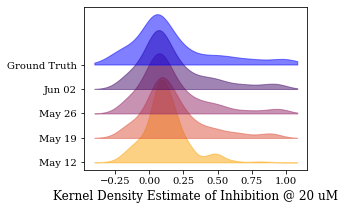

In [34]:
plt.rc('font', family='serif', size=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)




x_space = np.linspace(y_all.min(), y_all.max(), 100)

cmap=plt.get_cmap('inferno')

spacing = 1.0

plt.figure(figsize=(4, 3))

for idx in range(4):
    ds = collection[idx]
    
    net = pinot.Net(
        representation=pinot.representation.Sequential(
            layer=pinot.representation.dgl_legacy.gn(),
            config=[32, 'tanh', 32, 'tanh', 32, 'tanh']),
            output_regressor=pinot.regressors.ExactGaussianProcessRegressor)
    
    optimizer = torch.optim.Adam(net.parameters(), 1e-3)
    
    train = pinot.Train(
        net=net,
        data=ds,
        n_epochs=10,
        optimizer=optimizer
        )
    
    net = train.train()
    
    y_pred = net.condition(g_all).mean.detach().numpy()
    
    
    kde = scipy.stats.gaussian_kde(y_pred)(x_space)
    
    plt.fill_between(
        x_space,
        y1=spacing * idx,
        y2=kde + spacing * idx, 
        alpha=0.5, 
        # label=idx, 
        zorder=idx, 
        color=cmap(1.0 - float(idx / 5) - 0.2))
        

        
y_all = collection[3][0][1]
kde = scipy.stats.gaussian_kde(y_all.flatten().numpy())(x_space)
    
plt.fill_between(
    x_space,
    y1=spacing * 4,
    y2= kde + spacing * 4,
    alpha=0.5, 
    zorder=idx, 
    color='blue')

plt.yticks(
    ticks=[idx * spacing for idx in range(5)],
    labels=[
        'May 12',
        'May 19',
        'May 26',
        'Jun 02',
        'Ground Truth'
    ]
)
# plt.xlim(0, 0.5)

plt.xlabel('Kernel Density Estimate of Inhibition @ 20 uM')

    

tensor([[ 1.1629e-03],
        [ 8.5200e-01],
        [ 7.3746e-01],
        [ 5.2541e-01],
        [-4.4514e-02],
        [-1.1501e-02],
        [-1.0491e-02],
        [-4.6235e-02],
        [ 4.3852e-03],
        [-3.2087e-02],
        [-4.2164e-02],
        [-1.0713e-01],
        [-1.6383e-03],
        [ 4.0377e-03],
        [-1.4893e-04],
        [ 2.1943e-02],
        [ 5.1332e-02],
        [-6.8923e-02],
        [ 1.0079e-01],
        [-8.0755e-03],
        [-6.2337e-02],
        [ 6.7387e-01],
        [ 5.0604e-02],
        [ 8.7783e-01],
        [ 8.1716e-01],
        [ 9.0769e-01],
        [ 6.2805e-01],
        [ 7.8526e-01],
        [ 7.5578e-01],
        [ 7.3746e-01],
        [-2.7063e-01],
        [ 8.9519e-01],
        [ 4.0890e-01],
        [ 4.2669e-01],
        [ 3.3526e-02],
        [-3.8985e-02],
        [-2.6477e-02],
        [ 6.9254e-02],
        [ 3.3427e-02],
        [ 3.2673e-02],
        [ 7.7680e-01],
        [ 4.9125e-01],
        [ 4.9125e-01],
        [ 1